In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

import os

In [ ]:
df = pd.read_csv("train_dataset.csv")
df.head()

<ipython-input-10-941ab8e0eff6>:1: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,821,822,825,826,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449,1450,1451,1452,1453

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164


In [ ]:
df.shape

(14456, 2666)

In [ ]:
from datetime import datetime

df['report_date'] = pd.to_datetime(df['report_date'], format='%Y-%m-%d')
start_date = pd.to_datetime('2021-02-01', format='%Y-%m-%d')
df['report_date'] = (df['report_date'] - start_date) / np.timedelta64 ( 1 , 'M')
df['report_date'] = round(df['report_date'])

In [ ]:
missing_percentage = df.isnull().mean() * 100
columns_to_drop = missing_percentage[missing_percentage > 93].index
data = df.drop(columns=columns_to_drop)
data.shape

(14456, 793)

In [ ]:
data_obj = data[['col519', 'col520', 'col527', 'col528', 'col535', 'col536', 'col543', 'col544',
    'col551', 'col552', 'col560', 'col568', 'col576', 'col591', 'col592', 'col599', 'col600', 'col607', 'col608', 'col616', 'col1454']]
data_count = data.drop(columns=['col519', 'col520', 'col527', 'col528', 'col535', 'col536', 'col543', 'col544',
    'col551', 'col552', 'col560', 'col568', 'col576', 'col591', 'col592', 'col599', 'col600', 'col607', 'col608', 'col616', 'col1454'])

In [ ]:
data_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   col519   1106 non-null   object
 1   col520   1577 non-null   object
 2   col527   1108 non-null   object
 3   col528   1577 non-null   object
 4   col535   1108 non-null   object
 5   col536   1577 non-null   object
 6   col543   1108 non-null   object
 7   col544   1577 non-null   object
 8   col551   1108 non-null   object
 9   col552   1577 non-null   object
 10  col560   1308 non-null   object
 11  col568   1034 non-null   object
 12  col576   1021 non-null   object
 13  col591   1108 non-null   object
 14  col592   1577 non-null   object
 15  col599   1061 non-null   object
 16  col600   1529 non-null   object
 17  col607   1051 non-null   object
 18  col608   1524 non-null   object
 19  col616   1080 non-null   object
 20  col1454  14455 non-null  object
dtypes: object(21)
memory usage: 2.3+ MB

In [ ]:
data_count.iloc[30:45, 568:572]

,col2342,col2346,col2347,col2348
30,3.681828e+06,NaN,NaN,NaN
31,5.458558e+06,NaN,NaN,NaN
32,1.305545e+07,NaN,NaN,NaN
33,8.040044e+06,NaN,NaN,NaN
34,8.521482e+06,NaN,NaN,NaN
35,6.885765e+06,NaN,NaN,NaN
36,6.984334e+06,NaN,NaN,NaN
37,4.537685e+06,NaN,NaN,NaN
38,1.002420e+07,NaN,NaN,NaN
39,1.515400e+07,NaN,NaN,NaN


In [ ]:
data_count = data_count.drop(columns=['col2058'])

In [ ]:
data_count = data_count.drop(columns=['col2348'])

In [ ]:
!pip install nona
from nona.nona import nona
nona(data_count)

100%|██████████| 770/770 [07:17<00:00,  1.76it/s]


In [ ]:
#категориальные признаки
Data_obj = data_obj.dropna(thresh=15)
data_obj1 = Data_obj

In [ ]:
data_obj1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1106 entries, 1 to 14448
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   col519   1106 non-null   object
 1   col520   1106 non-null   object
 2   col527   1106 non-null   object
 3   col528   1106 non-null   object
 4   col535   1106 non-null   object
 5   col536   1106 non-null   object
 6   col543   1106 non-null   object
 7   col544   1106 non-null   object
 8   col551   1106 non-null   object
 9   col552   1106 non-null   object
 10  col560   1106 non-null   object
 11  col568   1106 non-null   object
 12  col576   1106 non-null   object
 13  col591   1106 non-null   object
 14  col592   1106 non-null   object
 15  col599   1106 non-null   object
 16  col600   1106 non-null   object
 17  col607   1106 non-null   object
 18  col608   1106 non-null   object
 19  col616   1106 non-null   object
 20  col1454  1106 non-null   object
dtypes: object(21)
memory usage: 222.4+ K

In [ ]:
data_obj1.shape

(1106, 21)

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

encoders={}
for col_name in data_obj1.columns:
    series = data_obj1[col_name]
    label_encoder = LabelEncoder()
    data_obj1[col_name] = pd.Series(label_encoder.fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index
    )
    encoders[col_name] = label_encoder

In [ ]:
nona(data_obj1)

100%|██████████| 21/21 [00:00<00:00, 1931.12it/s]


In [ ]:
data_obj1.shape

(1106, 21)

In [ ]:
for i in data_obj1.columns:
     Data_obj[i]=Data_obj[i].astype(int)
for col_name in data_obj1.columns:
    Data_obj[col_name] = encoders[col_name].inverse_transform(Data_obj[col_name])

In [ ]:
data_obj = data_obj1.copy()

In [ ]:
data_obj1.head(10)

,col519,col520,col527,col528,col535,col536,col543,col544,col551,col552,...,col568,col576,col591,col592,col599,col600,col607,col608,col616,col1454
1,page_load,page_load,Mobile Safari,Mobile Safari,iPhone,iPhone,iOS,iOS,/project/sputnik/,/project/sputnik/,...,sms,exponea,Russia,Russia,Moscow,Moscow,Moscow,Moscow,Google,01febac0-b083-494e-8589-f98400074b94
8,page_load,page_load,Chrome,Chrome,Android,Android,Android,Android,/,/,...,sms,exponea,Russia,Russia,Moscow,Moscow,Moscow,Moscow,Google,0b08a6bb-42f5-ec11-b822-005056b8a6d9
11,page_load,page_load,Chrome,Chrome,Android,Android,Android,Android,/spb/flats/,/spb/flats/,...,cpc,yandex_search,Russia,Russia,St.-Petersburg,St.-Petersburg,St Petersburg,St Petersburg,Google,0d4ec1c7-914f-ed11-b824-005056b89b68
22,page_load,page_load,Chrome,Chrome,Android,Android,Android,Android,/spb/,/spb/,...,cpc,yandex_search,Russia,Russia,Voronezh Oblast,Voronezh Oblast,Voronezh,Voronezh,Yandex,1464db6a-d629-ed11-b824-005056b89b68
23,page_load,page_load,Chrome,Chrome,Android,Android,Android,Android,/spb/account/login/,/spb/account/login/,...,cpc,yandex_search,Russia,Russia,St.-Petersburg,St.-Petersburg,St Petersburg,St Petersburg,Google,15ce3286-7a62-ed11-b822-005056b8a6c4
35,page_load,page_load,Chrome,Chrome,Android,Android,Android,Android,/account/flats/165351,/account/login/,...,email,exponea,Russia,Russia,St.-Petersburg,St.-Petersburg,St Petersburg,St Petersburg,Google,1db2162a-a9e4-ec11-b822-005056b8a6c4
39,page_load,page_load,Chrome,Chrome,Other,Other,Windows,Windows,/,/,...,cpc,yandex_search,Russia,Russia,Moscow,Moscow,Moscow,Moscow,Google,215aa8e0-237e-4261-a38b-ec34957b37cb
43,page_load,page_load,Chrome,Chrome,Other,Other,Windows,Windows,/project/verejskaya-41/,/project/verejskaya-41/,...,cpc,yandex_search,Russia,Russia,Moscow,Moscow,Moscow,Moscow,Google,2414a0d7-0e5a-ed11-b822-005056b8a6d9
46,page_load,page_load,Chrome,Chrome,Other,Other,Windows,Windows,/news/unikalnaya-rassrochka-na-vse-kladovye-po...,/news/unikalnaya-rassrochka-na-vse-kladovye-po...,...,email,exponea,Russia,Russia,St.-Petersburg,St.-Petersburg,St Petersburg,St Petersburg,Google,29eff6ae-d441-4f1d-a015-a1a39af31155
66,page_load,page_load,Chrome,Chrome,Other,Other,Windows,Windows,/account/,/account/,...,cpc,yandex_search,Russia,Russia,St.-Petersburg,St.-Petersburg,St Petersburg,St Petersburg,Google,3ef762d0-761c-ed11-b823-005056b8a72c


In [ ]:
data_count.head(10)

,report_date,client_id,target,col475,col476,col479,col480,col483,col484,col487,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,21.0,1,0,57.374441,57.507808,55.409766,54.787801,56.725908,56.686160,56.644107,...,5.291683e+06,4.740089e+06,4.894282e+06,7.714691e+06,8.438364e+06,8.101827e+06,5.898025e+06,5.879620e+06,5.899983e+06,0.256261
1,21.0,5,0,55.748300,55.748300,55.748300,55.748300,55.748299,55.748299,55.748300,...,1.186518e+07,1.219044e+07,1.200425e+07,7.616803e+06,7.616803e+06,7.616803e+06,7.616803e+06,7.616803e+06,7.616803e+06,0.256261
2,15.0,6,0,57.647069,58.108798,55.402054,55.098742,56.968912,57.274909,56.935755,...,2.356732e+06,1.836611e+06,1.976442e+06,7.162538e+06,8.442552e+06,7.810686e+06,5.285361e+06,5.382201e+06,5.334790e+06,0.256261
3,19.0,7,0,57.445389,57.693692,55.382953,54.893099,56.781339,56.866277,56.721462,...,4.864522e+06,5.226486e+06,5.058320e+06,4.563554e+06,5.662221e+06,5.113346e+06,3.213076e+06,4.714763e+06,3.989924e+06,0.258682
4,18.0,8,0,57.528068,57.820899,55.427487,54.941926,56.869809,56.994542,56.807538,...,1.026746e+07,1.102880e+07,1.066820e+07,8.371202e+06,8.040338e+06,8.216253e+06,8.021750e+06,7.815111e+06,7.924489e+06,0.254164
5,24.0,10,0,56.721054,56.831920,54.778305,54.674083,55.938682,55.973296,55.978652,...,1.085000e+07,1.085000e+07,1.085000e+07,1.085000e+07,1.085000e+07,1.085000e+07,1.085000e+07,1.085000e+07,1.085000e+07,0.318994
6,21.0,16,0,57.353161,57.492439,55.384526,54.789676,56.698831,56.668922,56.623339,...,-1.347639e+07,-1.343332e+07,-1.336264e+07,2.922698e+06,3.341854e+06,3.116489e+06,4.277805e+06,4.284722e+06,4.299969e+06,0.258853
7,23.0,17,0,57.283666,57.307649,55.413563,54.684337,56.645427,56.489974,56.547744,...,1.524765e+07,5.578357e+06,1.065888e+07,2.464646e+07,2.426715e+07,2.446426e+07,4.239142e+06,4.811758e+06,4.542198e+06,0.256261
8,23.0,18,0,55.748300,55.748300,55.748300,55.748300,55.748299,55.748299,55.748300,...,-4.888171e+06,-8.872658e+05,-1.888596e+06,2.073888e+07,1.780962e+07,1.946087e+07,2.214966e+07,2.013424e+07,2.117220e+07,0.266285
9,12.0,19,0,57.783443,58.409394,55.398928,55.254321,57.090723,57.569320,57.082087,...,9.662219e+06,1.038314e+07,1.004992e+07,8.825428e+06,8.802568e+06,8.822883e+06,8.210378e+06,8.271961e+06,8.235337e+06,0.256261


In [ ]:
data_count.shape

(14456, 770)

In [ ]:
#кластеризация катег.признаков

from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

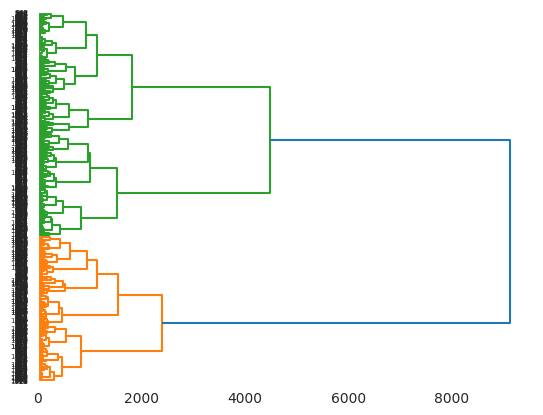

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
link = linkage(data_obj1, 'ward')
dn = dendrogram(link, orientation = 'right')

In [ ]:
#conda install clustergram -c conda-forge
!pip install clustergram
!pip install urbangrammar_graphics
from clustergram import Clustergram
import urbangrammar_graphics as ugg
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

sns.set(style='whitegrid')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 51.7 MB/s eta 0:00:00


K=1 skipped. Mean computed from data directly.
K=2 fitted in 2.131 seconds.
K=3 fitted in 1.872 seconds.
K=4 fitted in 2.149 seconds.
K=5 fitted in 3.298 seconds.
K=6 fitted in 3.343 seconds.
K=7 fitted in 2.404 seconds.
K=8 fitted in 2.028 seconds.
K=9 fitted in 3.838 seconds.


Text(0.5, 1.0, 'K-Means')

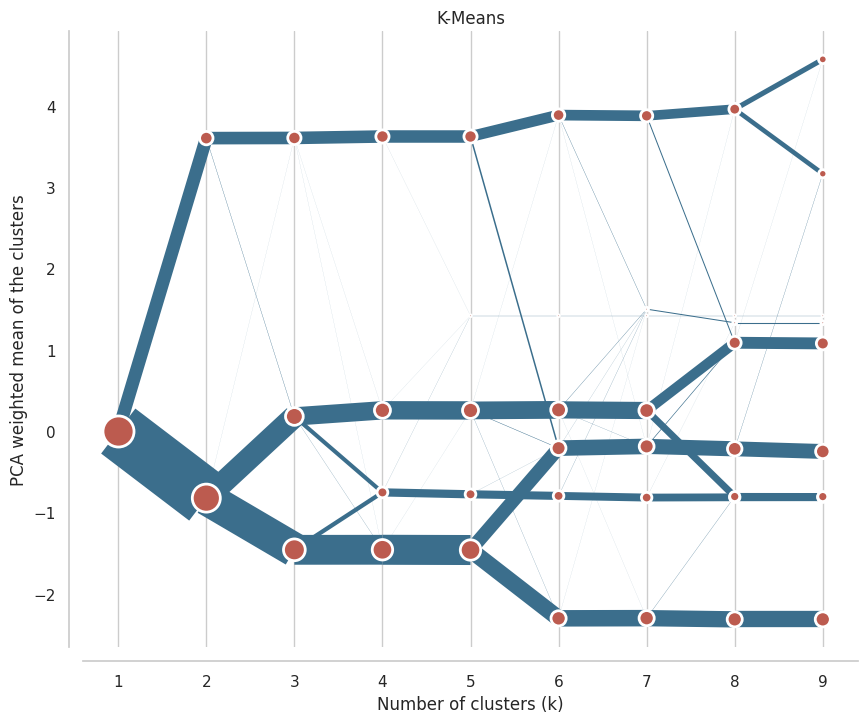

In [ ]:
data = scale(data_obj1)

cgram = Clustergram(range(1, 10), n_init=100)
cgram.fit(data)

ax = cgram.plot(
    figsize=(10, 8),
    line_style=dict(color=ugg.COLORS[1]),
    cluster_style={"color": ugg.COLORS[2]},
)
ax.yaxis.grid(False)
sns.despine(offset=10)
ax.set_title('K-Means')

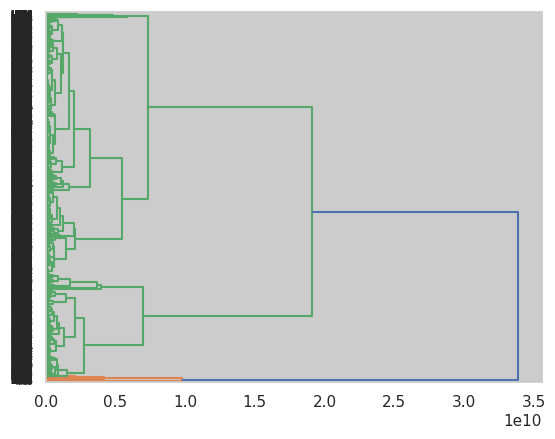

In [ ]:
#кластеризация числ.признаков

link = linkage(data_count, 'ward')
dn = dendrogram(link, orientation = 'right')

K=1 skipped. Mean computed from data directly.
K=2 fitted in 64.752 seconds.
K=3 fitted in 102.107 seconds.
K=4 fitted in 107.633 seconds.
K=5 fitted in 126.387 seconds.
K=6 fitted in 137.539 seconds.
K=7 fitted in 159.839 seconds.
K=8 fitted in 143.508 seconds.
K=9 fitted in 180.000 seconds.


Text(0.5, 1.0, 'K-Means')

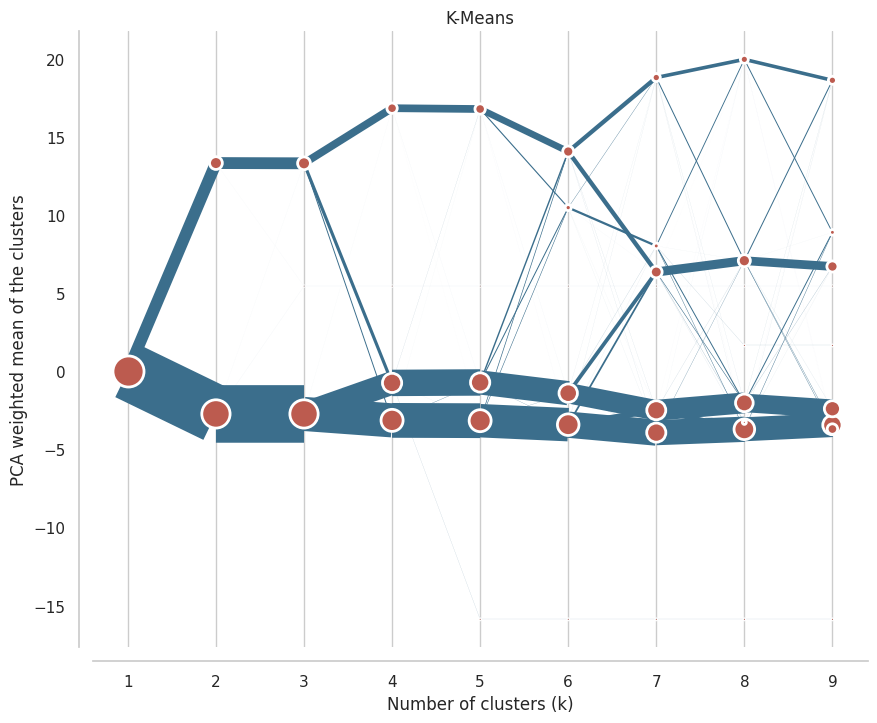

In [ ]:
data = scale(data_count)

cgram = Clustergram(range(1, 4), n_init=100)
cgram.fit(data)

ax = cgram.plot(
    figsize=(10, 8),
    line_style=dict(color=ugg.COLORS[1]),
    cluster_style={"color": ugg.COLORS[2]},
)
ax.yaxis.grid(False)
sns.despine(offset=10)
ax.set_title('K-Means')

In [ ]:
from sklearn.cluster import KMeans
X = data_count
kmeans = KMeans(n_clusters=2, random_state=10, n_init="auto").fit(X)
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
data_count['clusters']= kmeans.predict(X)

In [ ]:

kmeans.cluster_centers_

array([[1.80899847e+01, 2.56658033e+03, 1.39806812e-02, ...,
        5.82207140e+06, 2.57532611e-01, 1.00000000e+00],
       [1.47248908e+01, 2.56572489e+03, 3.05676856e-02, ...,
        5.55282312e+06, 2.57149659e-01, 3.10862447e-15],
       [1.54023123e+01, 2.96895444e+03, 3.63353736e-02, ...,
        6.83181110e+06, 2.58661201e-01, 2.00000000e+00]])

In [ ]:
data_count.to_csv (r' C:\Users\VLT-W50\clusters.csv')

In [ ]:
#кластеризация смешанных признаков

data_obj1 = data_obj1.merge(data_count, how='inner', left_index=True, right_index=True)

In [ ]:
Data = data_obj1

In [ ]:
dfMatrix = Data.to_numpy()

In [ ]:
catColumnsPos = [Data.columns.get_loc(col) for col in list(Data.select_dtypes('object').columns)]

In [ ]:
!pip install kneed
from kneed import KneeLocator
cost_knee_c3 = KneeLocator(
        x=range(1,7),
        y=cost,
        S=0.1, curve="convex", direction="decreasing", online=True)

K_cost_c3 = cost_knee_c3.elbow
print("elbow at k =", f'{K_cost_c3:.0f} clusters')

In [ ]:
#model with 3 clusters
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 0)

In [ ]:
data_count['clusters']= kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

In [ ]:
df.to_csv (r' Сlusters.csv')

In [ ]:
Data.head()

,col519,col520,col527,col528,col535,col536,col543,col544,col551,col552,...,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663,clusters
1,page_load,page_load,Mobile Safari,Mobile Safari,iPhone,iPhone,iOS,iOS,/project/sputnik/,/project/sputnik/,...,1.219044e+07,1.200425e+07,7.616803e+06,7.616803e+06,7.616803e+06,7.616803e+06,7.616803e+06,7.616803e+06,0.256261,2
8,page_load,page_load,Chrome,Chrome,Android,Android,Android,Android,/,/,...,-8.872658e+05,-1.888596e+06,2.073888e+07,1.780962e+07,1.946087e+07,2.214966e+07,2.013424e+07,2.117220e+07,0.266285,2
11,page_load,page_load,Chrome,Chrome,Android,Android,Android,Android,/spb/flats/,/spb/flats/,...,5.065000e+06,5.182500e+06,5.300000e+06,5.065000e+06,5.182500e+06,5.300000e+06,5.065000e+06,5.182500e+06,0.258209,2
22,page_load,page_load,Chrome,Chrome,Android,Android,Android,Android,/spb/,/spb/,...,8.284916e+06,8.284916e+06,8.284916e+06,8.284916e+06,8.284916e+06,8.284916e+06,8.284916e+06,8.284916e+06,0.257017,2
23,page_load,page_load,Chrome,Chrome,Android,Android,Android,Android,/spb/account/login/,/spb/account/login/,...,9.147105e+06,9.147105e+06,9.147105e+06,9.147105e+06,9.147105e+06,9.147105e+06,9.147105e+06,9.147105e+06,0.257698,2


In [ ]:
#predict the labels of clusters.
label = kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
print(label)

[2 2 2 ... 2 2 2]


In [ ]:
#the volume of each cluster
Data['clusters'].value_counts().plot(kind='bar')

In [ ]:

Data.groupby(['clusters']).mean()

In [ ]:

Data.groupby(['clusters']).agg(lambda x: pd.Series.mode(x).iat[0])

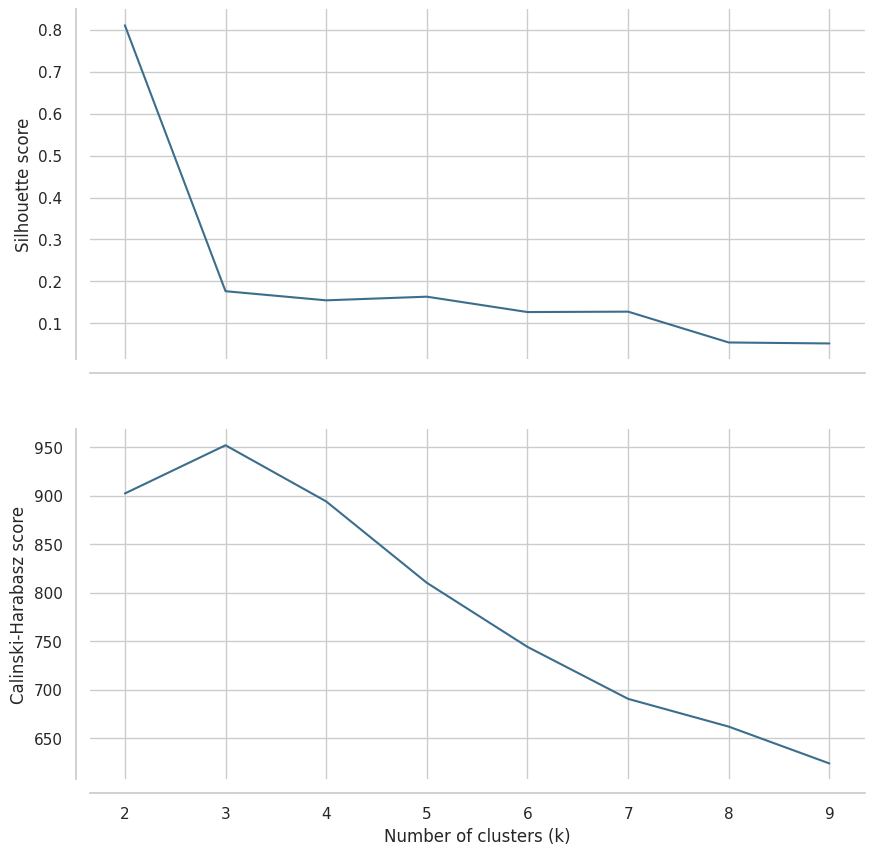

In [ ]:
fig, axs = plt.subplots(2, figsize=(10, 10), sharex=True)
cgram.silhouette_score().plot(
    xlabel="Number of clusters (k)",
    ylabel="Silhouette score",
    color=ugg.COLORS[1],
    ax=axs[0],
)
cgram.calinski_harabasz_score().plot(
    xlabel="Number of clusters (k)",
    ylabel="Calinski-Harabasz score",
    color=ugg.COLORS[1],
    ax=axs[1],
)
sns.despine(offset=10)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = data.copy()
X.drop(['target'], axis=1, inplace=True)
y = data['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11564, 341), (2892, 341), (11564,), (2892,))